In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [89]:
df = pd.read_csv("D:\IGT\data\customerchurn\customerchurn.csv")

In [90]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [91]:
df.drop('customerID',axis = 1,inplace = True)

In [92]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [93]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [94]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [95]:
df.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [96]:
pd.to_numeric(df.TotalCharges,errors = 'coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [97]:
df.shape

(7043, 20)

In [98]:
df[pd.to_numeric(df.TotalCharges,errors = 'coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [99]:
df1 = df[df.TotalCharges!=' ']

In [100]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

C:\Users\SAMIR\anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [101]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [102]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


(array([[ 877.,  259.,  159.,  114.,  102.,   98.,   72.,   70.,   46.,
           72.],
        [ 847.,  476.,  402.,  424.,  371.,  346.,  380.,  425.,  455.,
         1037.]]),
 array([ 1. ,  8.1, 15.2, 22.3, 29.4, 36.5, 43.6, 50.7, 57.8, 64.9, 72. ]),
 <a list of 2 BarContainer objects>)

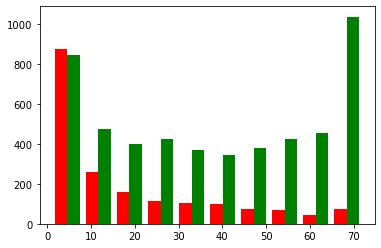

In [105]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure
plt.hist([tenure_churn_yes,tenure_churn_no],color = ['red','green'],label = ['Churn=Yes','Churn=No'])


(array([[ 148.,   57.,  119.,  152.,   53.,  350.,  355.,  319.,  273.,
           43.],
        [1452.,  134.,  246.,  485.,  419.,  544.,  597.,  550.,  485.,
          251.]]),
 array([ 18.25,  28.3 ,  38.35,  48.4 ,  58.45,  68.5 ,  78.55,  88.6 ,
         98.65, 108.7 , 118.75]),
 <a list of 2 BarContainer objects>)

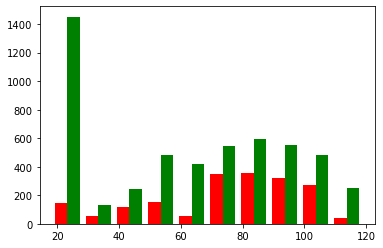

In [107]:
tenure_churn_no = df1[df1.Churn=='No'].MonthlyCharges
tenure_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges
plt.hist([tenure_churn_yes,tenure_churn_no],color = ['red','green'],label = ['Churn=Yes','Churn=No'])
# plt.xlabel('Monthly Charge')
# plt.ylabel("Number of Customers")
# plt.title("Customer Churn prediction visualization")
# plt.legend()

In [108]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [109]:
for col in df1:
    print(df1[col].unique())

['Female' 'Male']
[0 1]
['Yes' 'No']
['No' 'Yes']
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
['No' 'Yes']
['No phone service' 'No' 'Yes']
['DSL' 'Fiber optic' 'No']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['Month-to-month' 'One year' 'Two year']
['Yes' 'No']
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
['No' 'Yes']


In [110]:
for col in df1:
    print(f'{col} : {df1[col].unique()}')

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78

In [111]:
def print_unique_col_values(df):    
    for col in df1:
        if df[col].dtypes == 'object':
            print(f'{col} : {df[col].unique()}')

In [112]:
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [113]:
df1.replace('No internet service','No',inplace = True)
df1.replace('No phone service','No',inplace = True)

C:\Users\SAMIR\anaconda3\lib\site-packages\pandas\core\frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [114]:
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [115]:
yes_no_col = ['Partner','Dependents','PhoneService','MultipleLines',
             'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies',
              'PaperlessBilling','Churn']

In [116]:
for col in yes_no_col:
    df1[col].replace({'Yes':1,'No':0},inplace = True)

C:\Users\SAMIR\anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [117]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [118]:
df1['gender'].replace({'Male':1,'Female':0},inplace = True)

C:\Users\SAMIR\anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [119]:
df1.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6210,0,0,0,1,25,1,0,DSL,0,1,0,1,0,0,One year,1,Credit card (automatic),54.75,1266.35,0
4409,1,1,1,0,71,0,0,DSL,1,1,1,1,0,0,Two year,0,Credit card (automatic),46.35,3353.40,0
2863,1,0,0,0,1,1,0,DSL,0,0,0,0,0,0,Month-to-month,0,Mailed check,44.60,44.60,0
5900,1,0,1,1,37,0,0,DSL,1,1,1,0,0,0,Month-to-month,0,Bank transfer (automatic),40.20,1448.80,1
4289,0,0,0,0,54,1,0,No,0,0,0,0,0,0,Two year,0,Mailed check,20.10,1079.45,0


In [120]:
df1['gender'].unique()

array([0, 1], dtype=int64)

In [121]:
df2 = pd.get_dummies(data = df1,columns=['InternetService','Contract','PaymentMethod'])

In [122]:
df1.shape

(7032, 20)

In [123]:
df2.shape

(7032, 27)

In [124]:
df2.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4214,1,0,0,0,4,1,1,0,1,0,...,0,1,0,1,0,0,0,0,1,0
3928,0,0,1,0,18,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
4459,0,0,0,0,1,1,1,0,1,0,...,0,1,0,1,0,0,0,1,0,0


In [125]:
from sklearn.preprocessing import MinMaxScaler

In [126]:
scaler = MinMaxScaler()

In [127]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

In [128]:
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [129]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3107,0,0,1,0,1.000000,1,1,1,1,1,...,0,1,0,0,0,1,1,0,0,0
4567,1,0,0,0,0.464789,1,1,0,1,0,...,0,1,0,1,0,0,0,0,1,0
5334,0,0,1,1,0.676056,1,1,0,1,1,...,0,1,0,0,0,1,1,0,0,0
1443,1,0,1,0,0.028169,1,0,0,0,1,...,1,0,0,1,0,0,0,0,0,1
2790,0,0,0,0,0.690141,1,1,1,1,0,...,0,1,0,0,0,1,0,0,1,0


In [130]:
df2['TotalCharges']

0       0.001275
1       0.215867
2       0.010310
3       0.210241
4       0.015330
          ...   
7038    0.227521
7039    0.847461
7040    0.037809
7041    0.033210
7042    0.787641
Name: TotalCharges, Length: 7032, dtype: float64

In [131]:
X = df2.drop("Churn",axis =1)
y = df2.Churn

In [132]:
from sklearn.model_selection import train_test_split

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [134]:
len(X_train)

5625

In [135]:
X.shape

(7032, 26)

In [136]:
len(X_test)

1407

In [137]:
import tensorflow as tf
from tensorflow import keras

In [138]:
model = keras.Sequential([
    keras.layers.Dense(20,input_shape=(26,),activation = 'relu'),
    keras.layers.Dense(1,activation = 'sigmoid')
    
])
model.compile(optimizer='adam',loss = 'binary_crossentropy',metrics = ['accuracy'])
model.fit(X_train,y_train,epochs = 500)


Epoch 1/500
176/176 [==============================] - 1s 2ms/step - loss: 0.4895 - accuracy: 0.7572
Epoch 2/500
176/176 [==============================] - 0s 2ms/step - loss: 0.4277 - accuracy: 0.7920
Epoch 3/500
176/176 [==============================] - 0s 2ms/step - loss: 0.4195 - accuracy: 0.7963
Epoch 4/500
176/176 [==============================] - 0s 2ms/step - loss: 0.4156 - accuracy: 0.7993
Epoch 5/500
176/176 [==============================] - 0s 2ms/step - loss: 0.4138 - accuracy: 0.8009
Epoch 6/500
176/176 [==============================] - 0s 2ms/step - loss: 0.4122 - accuracy: 0.8052
Epoch 7/500
176/176 [==============================] - 0s 2ms/step - loss: 0.4111 - accuracy: 0.8039
Epoch 8/500
176/176 [==============================] - 0s 2ms/step - loss: 0.4105 - accuracy: 0.8032
Epoch 9/500
176/176 [==============================] - 0s 2ms/step - loss: 0.4092 - accuracy: 0.8039
Epoch 10/500
176/176 [==============================] - 0s 2ms/step - loss: 0.4089 - accura

176/176 [==============================] - 0s 2ms/step - loss: 0.3791 - accuracy: 0.8258
Epoch 82/500
176/176 [==============================] - 0s 2ms/step - loss: 0.3793 - accuracy: 0.8235
Epoch 83/500
176/176 [==============================] - 0s 2ms/step - loss: 0.3790 - accuracy: 0.8238
Epoch 84/500
176/176 [==============================] - 0s 2ms/step - loss: 0.3782 - accuracy: 0.8242
Epoch 85/500
176/176 [==============================] - 0s 2ms/step - loss: 0.3787 - accuracy: 0.8252
Epoch 86/500
176/176 [==============================] - 0s 2ms/step - loss: 0.3786 - accuracy: 0.8228
Epoch 87/500
176/176 [==============================] - 0s 2ms/step - loss: 0.3781 - accuracy: 0.8242
Epoch 88/500
176/176 [==============================] - 0s 2ms/step - loss: 0.3783 - accuracy: 0.8251
Epoch 89/500
176/176 [==============================] - 0s 2ms/step - loss: 0.3780 - accuracy: 0.8228
Epoch 90/500
176/176 [==============================] - 0s 2ms/step - loss: 0.3770 - accuracy: 

176/176 [==============================] - 0s 2ms/step - loss: 0.3684 - accuracy: 0.8293
Epoch 161/500
176/176 [==============================] - 0s 2ms/step - loss: 0.3678 - accuracy: 0.8277
Epoch 162/500
176/176 [==============================] - 0s 2ms/step - loss: 0.3674 - accuracy: 0.8277
Epoch 163/500
176/176 [==============================] - 0s 2ms/step - loss: 0.3679 - accuracy: 0.8245
Epoch 164/500
176/176 [==============================] - 0s 2ms/step - loss: 0.3685 - accuracy: 0.8265
Epoch 165/500
176/176 [==============================] - 0s 2ms/step - loss: 0.3687 - accuracy: 0.8284
Epoch 166/500
176/176 [==============================] - 0s 2ms/step - loss: 0.3672 - accuracy: 0.8267
Epoch 167/500
176/176 [==============================] - 0s 2ms/step - loss: 0.3672 - accuracy: 0.8290
Epoch 168/500
176/176 [==============================] - 0s 2ms/step - loss: 0.3672 - accuracy: 0.8284
Epoch 169/500
176/176 [==============================] - 0s 2ms/step - loss: 0.3669 - a

176/176 [==============================] - 0s 2ms/step - loss: 0.3611 - accuracy: 0.8284
Epoch 240/500
176/176 [==============================] - 0s 2ms/step - loss: 0.3612 - accuracy: 0.8295
Epoch 241/500
176/176 [==============================] - 0s 2ms/step - loss: 0.3612 - accuracy: 0.8309
Epoch 242/500
176/176 [==============================] - 0s 2ms/step - loss: 0.3623 - accuracy: 0.8268
Epoch 243/500
176/176 [==============================] - 0s 2ms/step - loss: 0.3606 - accuracy: 0.8313
Epoch 244/500
176/176 [==============================] - 0s 2ms/step - loss: 0.3611 - accuracy: 0.8313
Epoch 245/500
176/176 [==============================] - 0s 2ms/step - loss: 0.3614 - accuracy: 0.8268
Epoch 246/500
176/176 [==============================] - 0s 2ms/step - loss: 0.3605 - accuracy: 0.8284
Epoch 247/500
176/176 [==============================] - 0s 2ms/step - loss: 0.3604 - accuracy: 0.8308
Epoch 248/500
176/176 [==============================] - 0s 2ms/step - loss: 0.3607 - a

176/176 [==============================] - 0s 2ms/step - loss: 0.3565 - accuracy: 0.8286
Epoch 319/500
176/176 [==============================] - 0s 2ms/step - loss: 0.3569 - accuracy: 0.8297
Epoch 320/500
176/176 [==============================] - 0s 2ms/step - loss: 0.3563 - accuracy: 0.8299
Epoch 321/500
176/176 [==============================] - 0s 2ms/step - loss: 0.3565 - accuracy: 0.8290
Epoch 322/500
176/176 [==============================] - 0s 2ms/step - loss: 0.3555 - accuracy: 0.8327
Epoch 323/500
176/176 [==============================] - 0s 2ms/step - loss: 0.3561 - accuracy: 0.8324
Epoch 324/500
176/176 [==============================] - 0s 2ms/step - loss: 0.3558 - accuracy: 0.8302
Epoch 325/500
176/176 [==============================] - 0s 2ms/step - loss: 0.3562 - accuracy: 0.8338
Epoch 326/500
176/176 [==============================] - 0s 2ms/step - loss: 0.3554 - accuracy: 0.8316
Epoch 327/500
176/176 [==============================] - 0s 2ms/step - loss: 0.3549 - a

176/176 [==============================] - 0s 2ms/step - loss: 0.3521 - accuracy: 0.8332
Epoch 398/500
176/176 [==============================] - 0s 2ms/step - loss: 0.3529 - accuracy: 0.8338
Epoch 399/500
176/176 [==============================] - 0s 2ms/step - loss: 0.3522 - accuracy: 0.8359
Epoch 400/500
176/176 [==============================] - 0s 2ms/step - loss: 0.3521 - accuracy: 0.8363
Epoch 401/500
176/176 [==============================] - 0s 2ms/step - loss: 0.3526 - accuracy: 0.8348
Epoch 402/500
176/176 [==============================] - 0s 2ms/step - loss: 0.3524 - accuracy: 0.8340
Epoch 403/500
176/176 [==============================] - 0s 2ms/step - loss: 0.3521 - accuracy: 0.8366
Epoch 404/500
176/176 [==============================] - 0s 2ms/step - loss: 0.3516 - accuracy: 0.8345
Epoch 405/500
176/176 [==============================] - 0s 2ms/step - loss: 0.3516 - accuracy: 0.8356
Epoch 406/500
176/176 [==============================] - 0s 2ms/step - loss: 0.3518 - a

176/176 [==============================] - 0s 2ms/step - loss: 0.3500 - accuracy: 0.8361
Epoch 477/500
176/176 [==============================] - 0s 2ms/step - loss: 0.3507 - accuracy: 0.8356
Epoch 478/500
176/176 [==============================] - 0s 2ms/step - loss: 0.3495 - accuracy: 0.8389
Epoch 479/500
176/176 [==============================] - 0s 2ms/step - loss: 0.3501 - accuracy: 0.8352
Epoch 480/500
176/176 [==============================] - 0s 2ms/step - loss: 0.3497 - accuracy: 0.8395
Epoch 481/500
176/176 [==============================] - 0s 2ms/step - loss: 0.3499 - accuracy: 0.8348
Epoch 482/500
176/176 [==============================] - 0s 2ms/step - loss: 0.3499 - accuracy: 0.8388
Epoch 483/500
176/176 [==============================] - 0s 2ms/step - loss: 0.3489 - accuracy: 0.8366
Epoch 484/500
176/176 [==============================] - 0s 2ms/step - loss: 0.3498 - accuracy: 0.8373
Epoch 485/500
176/176 [==============================] - 0s 2ms/step - loss: 0.3501 - a

In [141]:
from sklearn.metrics import classification_report

ValueError: Found input variables with inconsistent numbers of samples: [1407, 748]

In [51]:
model.evaluate(X_test,y_test)

44/44 [==============================] - 0s 1ms/step - loss: 0.5147 - accuracy: 0.7726


[0.5147340893745422, 0.7725657224655151]

In [148]:
X_test.shape

(1407, 26)

In [52]:
yp = model.predict(X_test)

In [149]:
yp.shape

(1407, 1)

In [53]:
yp[:5]

array([[0.0046165 ],
       [0.05276439],
       [0.750329  ],
       [0.03248519],
       [0.05499202]], dtype=float32)

In [54]:
y_test[:10]

2481    0
6784    0
6125    1
3052    0
4099    0
3223    0
3774    0
3469    0
3420    0
1196    0
Name: Churn, dtype: int64

In [55]:
y_pred = []

for element in yp:
    if element >=0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [150]:
y_pred.shape

(748, 1)

In [56]:
y_pred[:10]

[0, 0, 1, 0, 0, 1, 0, 1, 0, 0]

In [144]:
print(classification_report(y_test,y_pred))

ValueError: Found input variables with inconsistent numbers of samples: [1407, 748]

In [57]:
import seaborn as sns


In [58]:
cm = tf.math.confusion_matrix(labels = y_test,predictions = y_pred)

In [59]:
sns.heatmap

<function seaborn.matrix.heatmap(data, *, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)>

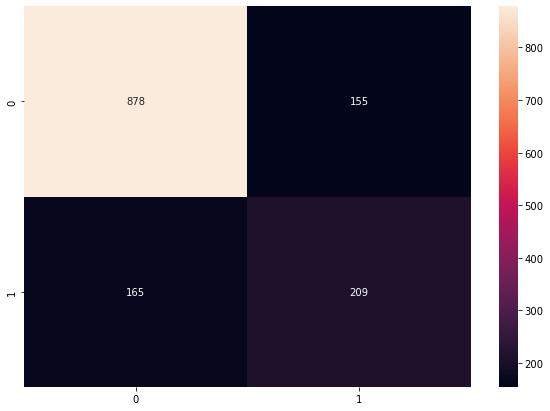

In [60]:
plt.figure(figsize = (10,7))
sns.heatmap(cm,annot = True,fmt = 'd')
plt.xlabel = ("Predicted")
plt.ylabel = ("Actual")
plt.show()

In [61]:
df2.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [62]:
count_class_0,count_class_1 = df2.Churn.value_counts()

In [66]:
df_class_0 = df2[df2['Churn'] == 0]
df_class_1 = df2[df2['Churn'] == 1]

In [70]:
df_class_0.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5020,0,0,0,0,0.563380,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
2440,1,0,1,1,0.436620,1,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
7,0,0,0,0,0.126761,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,1


In [73]:
df_class_0_under = df_class_0.sample(count_class_1)
df_class_0_under.shape

(1869, 27)

In [75]:
df_test_under = pd.concat([df_class_0_under,df_class_1],axis = 0)
df_test_under.shape

(3738, 27)

In [76]:
print(df_test_under.Churn.value_counts())

0    1869
1    1869
Name: Churn, dtype: int64


In [77]:
X = df_test_under.drop('Churn',axis = 1)
y = df_test_under['Churn']

In [78]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,stratify =y)

In [79]:
from sklearn.metrics import confusion_matrix,classification_report

In [81]:
def ANN (X_train,y_train,X_test,y_test, loss):
    model = keras.Sequential([
    keras.layers.Dense(20,input_shape=(26,),activation = 'relu'),
    keras.layers.Dense(1,activation = 'sigmoid')
    
    ])
    model.compile(optimizer='adam',loss = loss,metrics = ['accuracy'])
    model.fit(X_train,y_train,epochs = 500)
    print(model.evaluate(X_test,y_test))
    y_pred = model.predict(X_test)
    y_pred = np.round(y_pred)

    print("Classification report: \n",classification_report(y_test,y_pred))
    return y_pred

In [82]:
y_pred = ANN(X_train,y_train,X_test,y_test, 'binary_crossentropy')

Epoch 1/500
94/94 [==============================] - 1s 2ms/step - loss: 0.5921 - accuracy: 0.6773
Epoch 2/500
94/94 [==============================] - 0s 2ms/step - loss: 0.5198 - accuracy: 0.7518
Epoch 3/500
94/94 [==============================] - 0s 2ms/step - loss: 0.4999 - accuracy: 0.7639
Epoch 4/500
94/94 [==============================] - 0s 2ms/step - loss: 0.4916 - accuracy: 0.7625
Epoch 5/500
94/94 [==============================] - 0s 2ms/step - loss: 0.4882 - accuracy: 0.7632
Epoch 6/500
94/94 [==============================] - 0s 2ms/step - loss: 0.4855 - accuracy: 0.7672
Epoch 7/500
94/94 [==============================] - 0s 2ms/step - loss: 0.4835 - accuracy: 0.7666
Epoch 8/500
94/94 [==============================] - 0s 2ms/step - loss: 0.4821 - accuracy: 0.7676
Epoch 9/500
94/94 [==============================] - 0s 2ms/step - loss: 0.4809 - accuracy: 0.7696
Epoch 10/500
94/94 [==============================] - 0s 2ms/step - loss: 0.4804 - accuracy: 0.7689
Epoch 11/

94/94 [==============================] - 0s 2ms/step - loss: 0.4343 - accuracy: 0.7993
Epoch 84/500
94/94 [==============================] - 0s 2ms/step - loss: 0.4324 - accuracy: 0.8010
Epoch 85/500
94/94 [==============================] - 0s 2ms/step - loss: 0.4334 - accuracy: 0.7990
Epoch 86/500
94/94 [==============================] - 0s 2ms/step - loss: 0.4324 - accuracy: 0.8017
Epoch 87/500
94/94 [==============================] - 0s 2ms/step - loss: 0.4319 - accuracy: 0.7993
Epoch 88/500
94/94 [==============================] - 0s 2ms/step - loss: 0.4321 - accuracy: 0.7980
Epoch 89/500
94/94 [==============================] - 0s 2ms/step - loss: 0.4327 - accuracy: 0.7980
Epoch 90/500
94/94 [==============================] - 0s 2ms/step - loss: 0.4311 - accuracy: 0.8010
Epoch 91/500
94/94 [==============================] - 0s 2ms/step - loss: 0.4312 - accuracy: 0.7970
Epoch 92/500
94/94 [==============================] - 0s 2ms/step - loss: 0.4311 - accuracy: 0.7997
Epoch 93/500


94/94 [==============================] - 0s 2ms/step - loss: 0.4139 - accuracy: 0.8114
Epoch 165/500
94/94 [==============================] - 0s 2ms/step - loss: 0.4136 - accuracy: 0.8107
Epoch 166/500
94/94 [==============================] - 0s 2ms/step - loss: 0.4141 - accuracy: 0.8090
Epoch 167/500
94/94 [==============================] - 0s 2ms/step - loss: 0.4124 - accuracy: 0.8120
Epoch 168/500
94/94 [==============================] - 0s 2ms/step - loss: 0.4129 - accuracy: 0.8127
Epoch 169/500
94/94 [==============================] - 0s 2ms/step - loss: 0.4118 - accuracy: 0.8114
Epoch 170/500
94/94 [==============================] - 0s 2ms/step - loss: 0.4117 - accuracy: 0.8120
Epoch 171/500
94/94 [==============================] - 0s 2ms/step - loss: 0.4128 - accuracy: 0.8100
Epoch 172/500
94/94 [==============================] - 0s 2ms/step - loss: 0.4117 - accuracy: 0.8107
Epoch 173/500
94/94 [==============================] - 0s 2ms/step - loss: 0.4120 - accuracy: 0.8110
Epoc

94/94 [==============================] - 0s 2ms/step - loss: 0.4032 - accuracy: 0.8157
Epoch 246/500
94/94 [==============================] - 0s 2ms/step - loss: 0.4022 - accuracy: 0.8167
Epoch 247/500
94/94 [==============================] - 0s 2ms/step - loss: 0.4027 - accuracy: 0.8194
Epoch 248/500
94/94 [==============================] - 0s 2ms/step - loss: 0.4034 - accuracy: 0.8211
Epoch 249/500
94/94 [==============================] - 0s 2ms/step - loss: 0.4030 - accuracy: 0.8157
Epoch 250/500
94/94 [==============================] - 0s 2ms/step - loss: 0.4041 - accuracy: 0.8171
Epoch 251/500
94/94 [==============================] - 0s 2ms/step - loss: 0.4039 - accuracy: 0.8147
Epoch 252/500
94/94 [==============================] - 0s 2ms/step - loss: 0.4042 - accuracy: 0.8144
Epoch 253/500
94/94 [==============================] - 0s 2ms/step - loss: 0.4039 - accuracy: 0.8154
Epoch 254/500
94/94 [==============================] - 0s 2ms/step - loss: 0.4026 - accuracy: 0.8194
Epoc

94/94 [==============================] - 0s 2ms/step - loss: 0.3968 - accuracy: 0.8211
Epoch 327/500
94/94 [==============================] - 0s 2ms/step - loss: 0.3965 - accuracy: 0.8181
Epoch 328/500
94/94 [==============================] - 0s 2ms/step - loss: 0.3963 - accuracy: 0.8167
Epoch 329/500
94/94 [==============================] - 0s 2ms/step - loss: 0.3964 - accuracy: 0.8207
Epoch 330/500
94/94 [==============================] - 0s 2ms/step - loss: 0.3963 - accuracy: 0.8201
Epoch 331/500
94/94 [==============================] - 0s 2ms/step - loss: 0.3966 - accuracy: 0.8157
Epoch 332/500
94/94 [==============================] - 0s 2ms/step - loss: 0.3952 - accuracy: 0.8177
Epoch 333/500
94/94 [==============================] - 0s 2ms/step - loss: 0.3974 - accuracy: 0.8177
Epoch 334/500
94/94 [==============================] - 0s 2ms/step - loss: 0.3954 - accuracy: 0.8201
Epoch 335/500
94/94 [==============================] - 0s 2ms/step - loss: 0.3967 - accuracy: 0.8204
Epoc

94/94 [==============================] - 0s 2ms/step - loss: 0.3927 - accuracy: 0.8181
Epoch 408/500
94/94 [==============================] - 0s 2ms/step - loss: 0.3922 - accuracy: 0.8247
Epoch 409/500
94/94 [==============================] - 0s 2ms/step - loss: 0.3916 - accuracy: 0.8217
Epoch 410/500
94/94 [==============================] - 0s 2ms/step - loss: 0.3918 - accuracy: 0.8137
Epoch 411/500
94/94 [==============================] - 0s 2ms/step - loss: 0.3933 - accuracy: 0.8221
Epoch 412/500
94/94 [==============================] - 0s 2ms/step - loss: 0.3918 - accuracy: 0.8217
Epoch 413/500
94/94 [==============================] - 0s 2ms/step - loss: 0.3919 - accuracy: 0.8214
Epoch 414/500
94/94 [==============================] - 0s 2ms/step - loss: 0.3921 - accuracy: 0.8197
Epoch 415/500
94/94 [==============================] - 0s 2ms/step - loss: 0.3927 - accuracy: 0.8241
Epoch 416/500
94/94 [==============================] - 0s 2ms/step - loss: 0.3929 - accuracy: 0.8204
Epoc

94/94 [==============================] - 0s 2ms/step - loss: 0.3879 - accuracy: 0.8217
Epoch 489/500
94/94 [==============================] - 0s 2ms/step - loss: 0.3888 - accuracy: 0.8231
Epoch 490/500
94/94 [==============================] - 0s 2ms/step - loss: 0.3884 - accuracy: 0.8247
Epoch 491/500
94/94 [==============================] - 0s 2ms/step - loss: 0.3879 - accuracy: 0.8191
Epoch 492/500
94/94 [==============================] - 0s 2ms/step - loss: 0.3876 - accuracy: 0.8237
Epoch 493/500
94/94 [==============================] - 0s 2ms/step - loss: 0.3882 - accuracy: 0.8191
Epoch 494/500
94/94 [==============================] - 0s 2ms/step - loss: 0.3894 - accuracy: 0.8224
Epoch 495/500
94/94 [==============================] - 0s 2ms/step - loss: 0.3870 - accuracy: 0.8221
Epoch 496/500
94/94 [==============================] - 0s 2ms/step - loss: 0.3903 - accuracy: 0.8227
Epoch 497/500
94/94 [==============================] - 0s 2ms/step - loss: 0.3882 - accuracy: 0.8258
Epoc